### Forest Fire Risk Prediction
#### 23048573_ArchanaGiri

In [280]:
# Install all necessary libraries
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn openpyxl
!pip install pymysql
print("All libraries installed")


All libraries installed


#### Import all usefull libraries

In [113]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve
print("Libraries imported successfully!")

Libraries imported successfully!


#### Load Dataset 

In [282]:
# Load dataset 
file_path='ForestFire.csv'
df=pd.read_csv(file_path)
print("Dataset Loded Successfully")

Dataset Loded Successfully


In [284]:
#Show dataset shape
print("\n1. DATASET SHAPE")
print(f"   Rows: {df.shape[0]}")
print(f"   Columns: {df.shape[1]}")


1. DATASET SHAPE
   Rows: 2812
   Columns: 12


In [286]:
# Show dataset first 5 works
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("\nFirst 5 rows:")
df.head()


Dataset has 2812 rows and 12 columns

First 5 rows:


,Time (NPT),MaximumTemperature,MinimumTemperature,Humidity,Province,District,Ga.Pa./No.Pa.,Ward,Protected area,Credibility,Latitude,Longitude
0,01/01/2019 00:00:00,22.8,6.0,73.6,Lumbini,Arghakhanchi,Bhumekasthan,4,NaN,82,28.00200,83.03600
1,01/02/2019 00:00:00,23.4,4.8,86.6,Lumbini,Arghakhanchi,Bhumekasthan,6,NaN,47,27.99700,83.04000
2,01/03/2019 00:00:00,22.4,4.5,87.8,Lumbini,Arghakhanchi,Panini,6,NaN,19,27.89170,83.19279
3,01/04/2019 00:00:00,22.5,7.0,81.8,Lumbini,Arghakhanchi,Sitaganga,9,NaN,60,27.85710,82.87150
4,01/05/2019 00:00:00,23.4,7.0,79.7,Lumbini,Arghakhanchi,Sitaganga,9,NaN,41,27.85989,82.88692


#### Check dataset basic information

In [289]:
print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
df.describe()


Column Names:
['Time (NPT)', 'MaximumTemperature', 'MinimumTemperature', 'Humidity', 'Province', 'District', 'Ga.Pa./No.Pa.', 'Ward', 'Protected area', 'Credibility', 'Latitude', 'Longitude']

Data Types:
Time (NPT)             object
MaximumTemperature    float64
MinimumTemperature    float64
Humidity              float64
Province               object
District               object
Ga.Pa./No.Pa.          object
Ward                    int64
Protected area         object
Credibility             int64
Latitude              float64
Longitude             float64
dtype: object

Basic Statistics:


,MaximumTemperature,MinimumTemperature,Humidity,Ward,Credibility,Latitude,Longitude
count,2506.000000,2506.000000,2507.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,31.190648,18.842382,74.311297,21.536984,61.450569,28.079700,82.407785
std,6.322765,7.057711,16.627228,36.288447,18.821184,0.264434,0.683861
min,10.400000,3.200000,22.735000,1.000000,0.000000,27.365280,81.212810
25%,27.400000,12.500000,65.050000,2.000000,49.000000,27.883535,81.847390
50%,32.800000,20.000000,79.800000,5.000000,63.000000,28.055280,82.472550
75%,35.600000,25.500000,86.355000,9.000000,75.000000,28.248603,82.901682
max,44.000000,31.800000,100.000000,99.000000,100.000000,28.816200,83.994150


### Clean dataset

In [292]:
# Check missing values
missing = df.isnull().sum()
print("\nMissing values in each column:")
print(missing[missing > 0])


Missing values in each column:
Time (NPT)             305
MaximumTemperature     306
MinimumTemperature     306
Humidity               305
Protected area        1878
dtype: int64


In [294]:
# Fill missing values
# For numbers: use median (middle value)
# For text: use most common value

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled missing values in '{col}' with median")
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"Filled missing values in '{col}' with most common value")

print("\n No more missing values!")


Filled missing values in 'Time (NPT)' with most common value
Filled missing values in 'MaximumTemperature' with median
Filled missing values in 'MinimumTemperature' with median
Filled missing values in 'Humidity' with median
Filled missing values in 'Protected area' with most common value

 No more missing values!


In [296]:
#Removing duplicate rows
original_rows = len(df)
df = df.drop_duplicates()
removed = original_rows - len(df)

print(f"Original rows: {original_rows}")
print(f"After removing duplicates: {len(df)}")
print(f"Duplicates removed: {removed}")

if removed > 0:
    print("Duplicates removed!")
else:
    print("No duplicates found!")


Original rows: 2812
After removing duplicates: 2804
Duplicates removed: 8
Duplicates removed!


#### Rename Columns

In [299]:
df.rename(columns={
    'Time (NPT)': 'Date',
    'MaximumTemperature': 'Max_Temp',
    'MinimumTemperature': 'Min_Temp',
    'Humidity': 'Humidity',
    'Province': 'Province',
    'District': 'District',
    'Ga.Pa./No': 'Location',
    'Ward': 'Ward',
    'Protected area':'Protected_area',
    'Credibility':'Credibility',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude'
}, inplace=True)

print("Columns renamed!")
print(df.columns.tolist())


Columns renamed!
['Date', 'Max_Temp', 'Min_Temp', 'Humidity', 'Province', 'District', 'Ga.Pa./No.Pa.', 'Ward', 'Protected_area', 'Credibility', 'Latitude', 'Longitude']


In [301]:
df.head()

,Date,Max_Temp,Min_Temp,Humidity,Province,District,Ga.Pa./No.Pa.,Ward,Protected_area,Credibility,Latitude,Longitude
0,01/01/2019 00:00:00,22.8,6.0,73.6,Lumbini,Arghakhanchi,Bhumekasthan,4,Bardia National Park,82,28.00200,83.03600
1,01/02/2019 00:00:00,23.4,4.8,86.6,Lumbini,Arghakhanchi,Bhumekasthan,6,Bardia National Park,47,27.99700,83.04000
2,01/03/2019 00:00:00,22.4,4.5,87.8,Lumbini,Arghakhanchi,Panini,6,Bardia National Park,19,27.89170,83.19279
3,01/04/2019 00:00:00,22.5,7.0,81.8,Lumbini,Arghakhanchi,Sitaganga,9,Bardia National Park,60,27.85710,82.87150
4,01/05/2019 00:00:00,23.4,7.0,79.7,Lumbini,Arghakhanchi,Sitaganga,9,Bardia National Park,41,27.85989,82.88692


#### Creating New Features

In [304]:
#Temperature Range
df['Temp_Range'] = df['Max_Temp'] - df['Min_Temp']
print("Created: Temp_Range")

#  Average Temperature
df['Temp_Avg'] = (df['Max_Temp'] + df['Min_Temp']) / 2
print("Created: Temp_Avg")

# Parse Date and extract Month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Day_of_Year'] = df['Date'].dt.dayofyear
print("Created: Month, Day_of_Year")

# Season (based on month)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)
print("Created: Season")

# Drought Index (Fire risk indicator)
# Formula: Higher temperature + Lower humidity = Higher risk
df['Drought_Index'] = (df['Temp_Avg'] / 30 * 0.4 + 
                       (100 - df['Humidity']) / 100 * 0.5 + 
                       df['Temp_Range'] / 20 * 0.1) * 100

print("Created: Drought_Index")

print(f"\n All new features created!")
print(f"Dataset now has {df.shape[1]} columns")

Created: Temp_Range
Created: Temp_Avg
Created: Month, Day_of_Year
Created: Season
Created: Drought_Index

 All new features created!
Dataset now has 18 columns


In [306]:
df.head()

,Date,Max_Temp,Min_Temp,Humidity,Province,District,Ga.Pa./No.Pa.,Ward,Protected_area,Credibility,Latitude,Longitude,Temp_Range,Temp_Avg,Month,Day_of_Year,Season,Drought_Index
0,2019-01-01,22.8,6.0,73.6,Lumbini,Arghakhanchi,Bhumekasthan,4,Bardia National Park,82,28.00200,83.03600,16.8,14.40,1,1,Winter,40.800000
1,2019-01-02,23.4,4.8,86.6,Lumbini,Arghakhanchi,Bhumekasthan,6,Bardia National Park,47,27.99700,83.04000,18.6,14.10,1,2,Winter,34.800000
2,2019-01-03,22.4,4.5,87.8,Lumbini,Arghakhanchi,Panini,6,Bardia National Park,19,27.89170,83.19279,17.9,13.45,1,3,Winter,32.983333
3,2019-01-04,22.5,7.0,81.8,Lumbini,Arghakhanchi,Sitaganga,9,Bardia National Park,60,27.85710,82.87150,15.5,14.75,1,4,Winter,36.516667
4,2019-01-05,23.4,7.0,79.7,Lumbini,Arghakhanchi,Sitaganga,9,Bardia National Park,41,27.85989,82.88692,16.4,15.20,1,5,Winter,38.616667


#### Create Target variable

In [309]:
# Calculate Fire Weather Index
def calculate_fire_risk(row):
    # Temperature score (0-30 points)
    temp = row['Temp_Avg']
    if temp < 15:
        temp_score = 0
    elif temp < 25:
        temp_score = (temp - 15) * 2
    else:
        temp_score = 20 + min((temp - 25) * 2, 10)
    
    # Humidity score (0-40 points)
    humidity_score = (100 - row['Humidity']) * 0.4
    
    # Temperature range score (0-15 points)
    range_score = min(row['Temp_Range'] * 0.75, 15)
    
    # Drought score (0-15 points)
    drought_score = row['Drought_Index'] * 0.15
    
    # Total Fire Weather Index (0-100)
    fwi = temp_score + humidity_score + range_score + drought_score
    return max(0, min(100, fwi))

# Calculate FWI
df['Fire_Weather_Index'] = df.apply(calculate_fire_risk, axis=1)

# Create Risk Labels
def classify_risk(fwi):
    if fwi < 25:
        return 'Low', 0
    elif fwi < 50:
        return 'Moderate', 1
    elif fwi < 75:
        return 'High', 2
    else:
        return 'Extreme', 3

df[['Risk_Level', 'Risk_Code']] = df['Fire_Weather_Index'].apply(
    lambda x: pd.Series(classify_risk(x))
)

print("Fire Risk Labels Created!")


Fire Risk Labels Created!



 Risk Distribution:
Risk_Level
Moderate    1331
High        1001
Low          319
Extreme      153
Name: count, dtype: int64


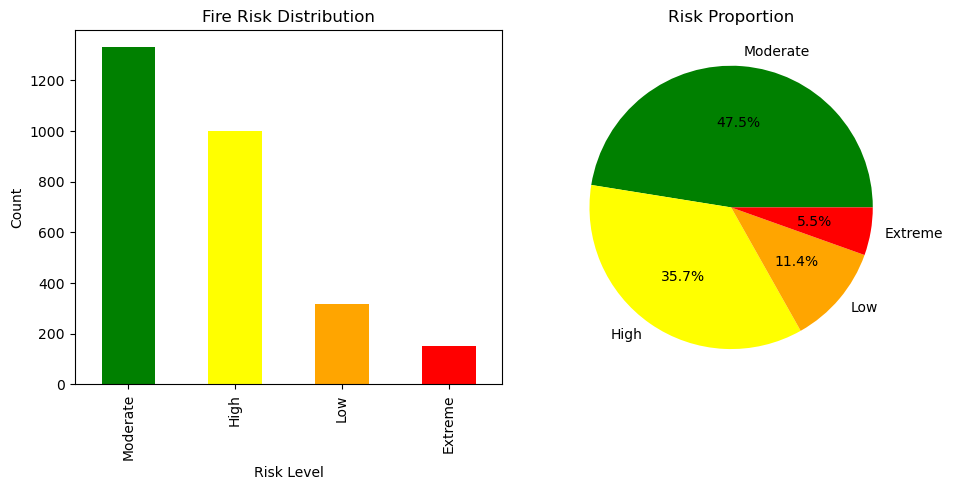

In [311]:
# Show distribution
print("\n Risk Distribution:")
risk_dist = df['Risk_Level'].value_counts()
print(risk_dist)

# Visualize
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
risk_dist.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Fire Risk Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
risk_dist.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'yellow', 'orange', 'red'])
plt.title('Risk Proportion')
plt.ylabel('')

plt.tight_layout()
plt.show()

#### Data Visualization

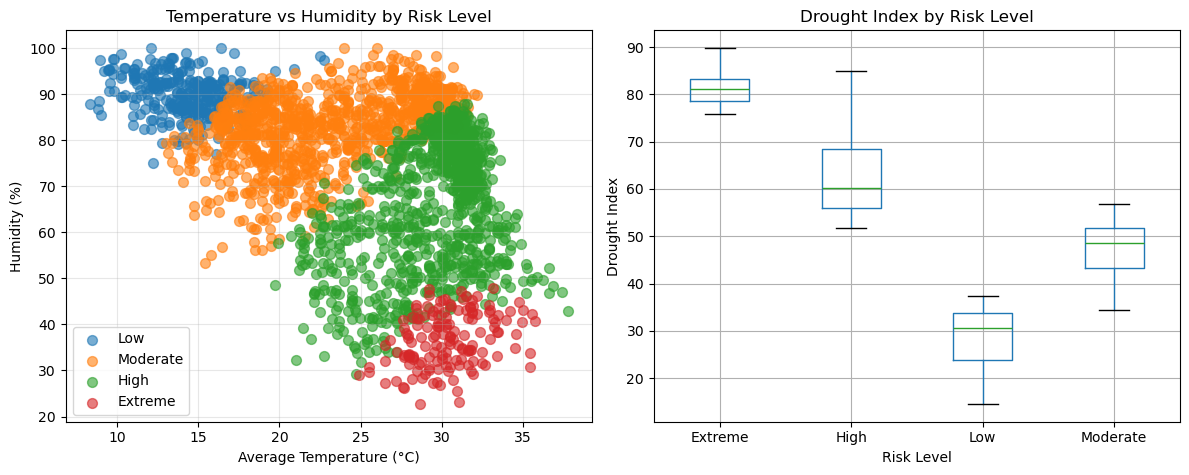

In [314]:
# 1. Temperature vs Humidity by Risk
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for risk in ['Low', 'Moderate', 'High', 'Extreme']:
    subset = df[df['Risk_Level'] == risk]
    plt.scatter(subset['Temp_Avg'], subset['Humidity'], 
               label=risk, alpha=0.6, s=50)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity by Risk Level')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
df.boxplot(column='Drought_Index', by='Risk_Level', ax=plt.gca())
plt.suptitle('')
plt.title('Drought Index by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Drought Index')

plt.tight_layout()
plt.show()


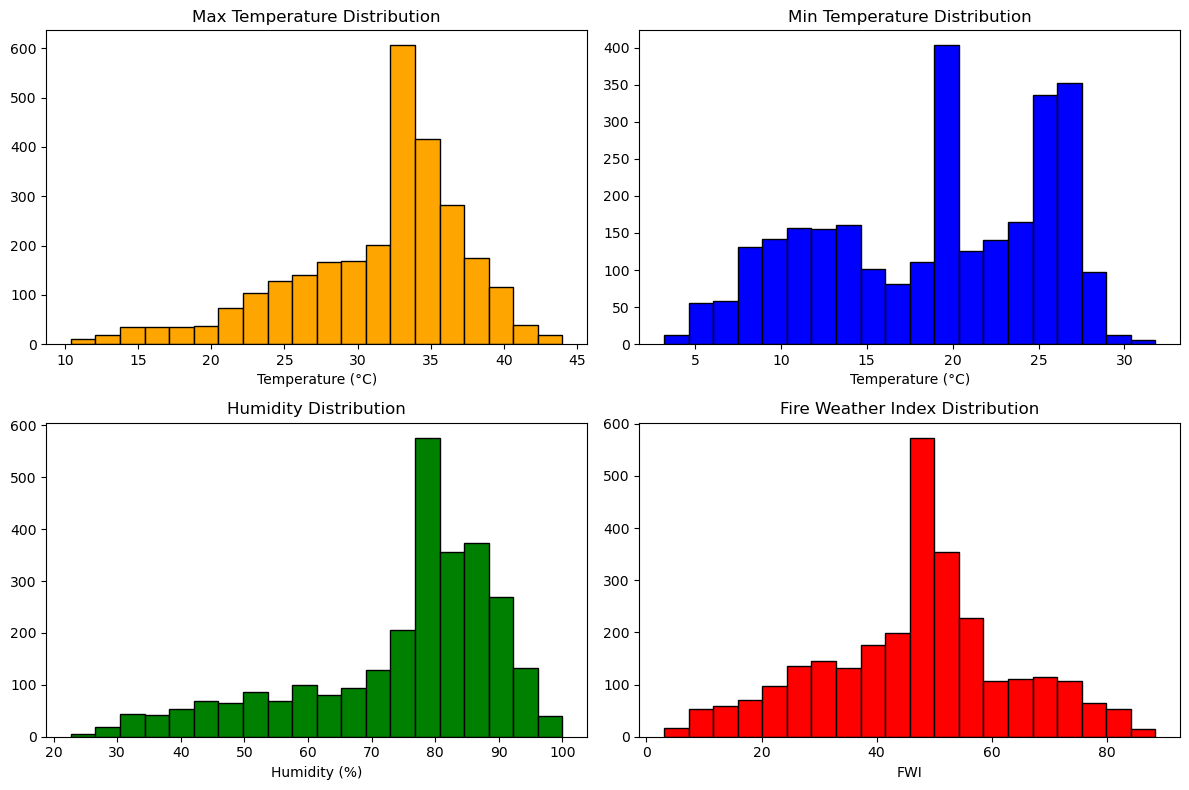

Visualizations complete!


In [316]:

# 2. Feature Distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(df['Max_Temp'], bins=20, color='orange', edgecolor='black')
axes[0, 0].set_title('Max Temperature Distribution')
axes[0, 0].set_xlabel('Temperature (°C)')

axes[0, 1].hist(df['Min_Temp'], bins=20, color='blue', edgecolor='black')
axes[0, 1].set_title('Min Temperature Distribution')
axes[0, 1].set_xlabel('Temperature (°C)')

axes[1, 0].hist(df['Humidity'], bins=20, color='green', edgecolor='black')
axes[1, 0].set_title('Humidity Distribution')
axes[1, 0].set_xlabel('Humidity (%)')

axes[1, 1].hist(df['Fire_Weather_Index'], bins=20, color='red', edgecolor='black')
axes[1, 1].set_title('Fire Weather Index Distribution')
axes[1, 1].set_xlabel('FWI')

plt.tight_layout()
plt.show()

print("Visualizations complete!")

In [318]:
df

,Date,Max_Temp,Min_Temp,Humidity,Province,District,Ga.Pa./No.Pa.,Ward,Protected_area,Credibility,...,Longitude,Temp_Range,Temp_Avg,Month,Day_of_Year,Season,Drought_Index,Fire_Weather_Index,Risk_Level,Risk_Code
0,2019-01-01,22.8,6.0,73.6,Lumbini,Arghakhanchi,Bhumekasthan,4,Bardia National Park,82,...,83.03600,16.8,14.40,1,1,Winter,40.800000,29.2800,Moderate,1
1,2019-01-02,23.4,4.8,86.6,Lumbini,Arghakhanchi,Bhumekasthan,6,Bardia National Park,47,...,83.04000,18.6,14.10,1,2,Winter,34.800000,24.5300,Low,0
2,2019-01-03,22.4,4.5,87.8,Lumbini,Arghakhanchi,Panini,6,Bardia National Park,19,...,83.19279,17.9,13.45,1,3,Winter,32.983333,23.2525,Low,0
3,2019-01-04,22.5,7.0,81.8,Lumbini,Arghakhanchi,Sitaganga,9,Bardia National Park,60,...,82.87150,15.5,14.75,1,4,Winter,36.516667,24.3825,Low,0
4,2019-01-05,23.4,7.0,79.7,Lumbini,Arghakhanchi,Sitaganga,9,Bardia National Park,41,...,82.88692,16.4,15.20,1,5,Winter,38.616667,26.6125,Moderate,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,2019-01-01,32.8,20.0,79.8,Lumbini,Rupandehi,Debdah,10,Bardia National Park,6,...,83.50882,12.8,26.40,1,1,Winter,51.700000,48.2350,Moderate,1
2808,2019-01-01,32.8,20.0,79.8,Lumbini,Rupandehi,Butwal,12,Bardia National Park,15,...,83.42764,12.8,26.40,1,1,Winter,51.700000,48.2350,Moderate,1
2809,2019-01-01,32.8,20.0,79.8,Lumbini,Rupandehi,Debdah,10,Bardia National Park,77,...,83.52421,12.8,26.40,1,1,Winter,51.700000,48.2350,Moderate,1
2810,2019-01-01,32.8,20.0,79.8,Lumbini,Rupandehi,Sainamaina,10,Bardia National Park,63,...,83.22276,12.8,26.40,1,1,Winter,51.700000,48.2350,Moderate,1


#### Feature correlation Heat Map

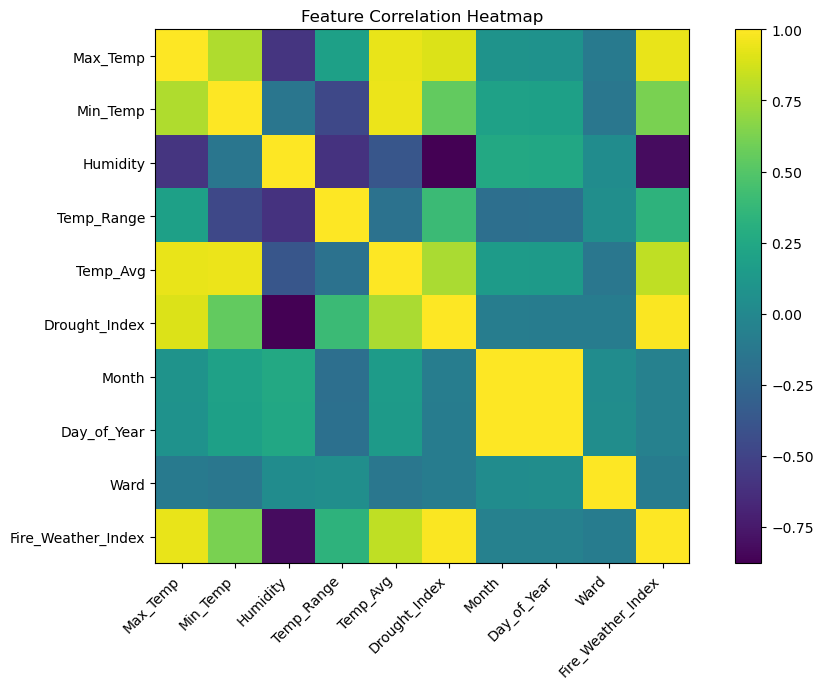

In [324]:
# Compute the correlation matrix for selected features
# This measures how strongly each feature is related to others
# Values range from -1 (strong negative) to +1 (strong positive)
corr = df[features + ['Fire_Weather_Index']].corr()

plt.figure(figsize=(10,7))
plt.imshow(corr)
plt.colorbar()
# Set x-axis labels as feature names and rotate for clarity
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
# Set y-axis labels as feature names
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


#### Temperature Range By Fire Risk Level

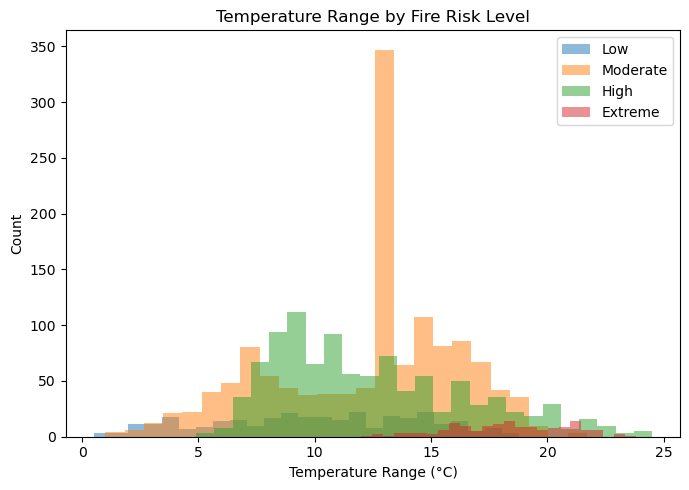

In [326]:
plt.figure(figsize=(7,5))  # Set figure size for clear visualization

# Plot temperature range distribution for each fire risk category
for r in ['Low', 'Moderate', 'High', 'Extreme']:
    subset = df[df['Risk_Level'] == r]  # Filter data by risk level
    plt.hist(subset['Temp_Range'], bins=25, alpha=0.5, label=r)

plt.title("Temperature Range by Fire Risk Level")
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Count")
plt.legend()               # Identify risk levels
plt.tight_layout()         # Improve spacing
plt.show()


#### Drought Index Across Fire Risk levels

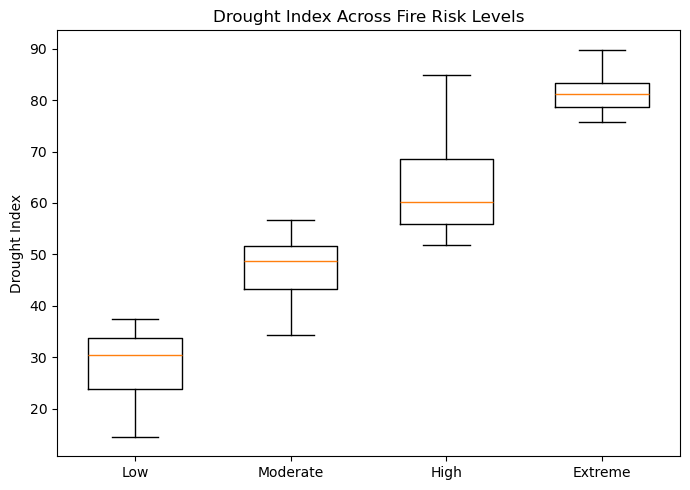

In [328]:
plt.figure(figsize=(7,5))  # Set figure size for better readability

# Create boxplots of drought index for each fire risk category
for r in ['Low', 'Moderate', 'High', 'Extreme']:
    subset = df[df['Risk_Level'] == r]  # Filter data by risk level
    plt.boxplot(
        subset['Drought_Index'],
        positions=[['Low','Moderate','High','Extreme'].index(r)],
        widths=0.6
    )

plt.xticks(range(4), ['Low','Moderate','High','Extreme'])  # Label risk levels
plt.title("Drought Index Across Fire Risk Levels")
plt.ylabel("Drought Index")
plt.tight_layout()
plt.show()


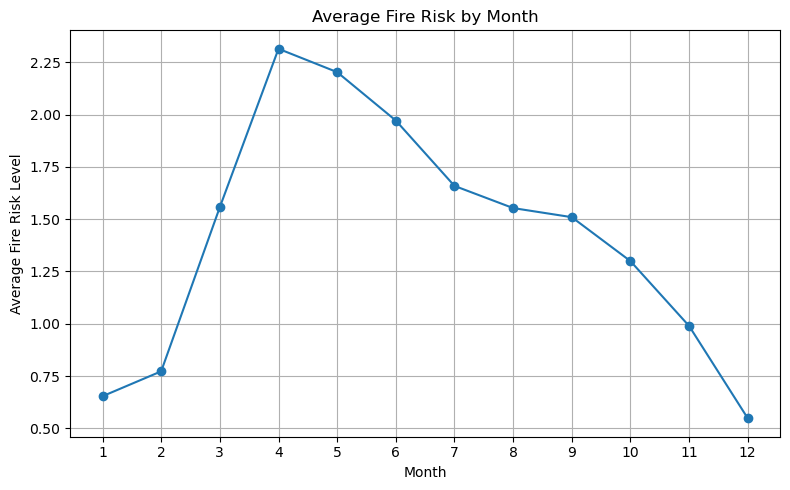

In [330]:
# Calculate average fire risk level for each month
monthly_risk = df.groupby('Month')['Risk_Code'].mean()

plt.figure(figsize=(8,5))  # Set figure size
plt.plot(monthly_risk.index, monthly_risk.values, marker='o')  # Plot monthly trend

plt.title("Average Fire Risk by Month")
plt.xlabel("Month")
plt.ylabel("Average Fire Risk Level")
plt.xticks(range(1,13))    # Show all months
plt.grid(True)             # Add grid for readability
plt.tight_layout()
plt.show()


#### Monthly Distribution of Fire Risk Levels

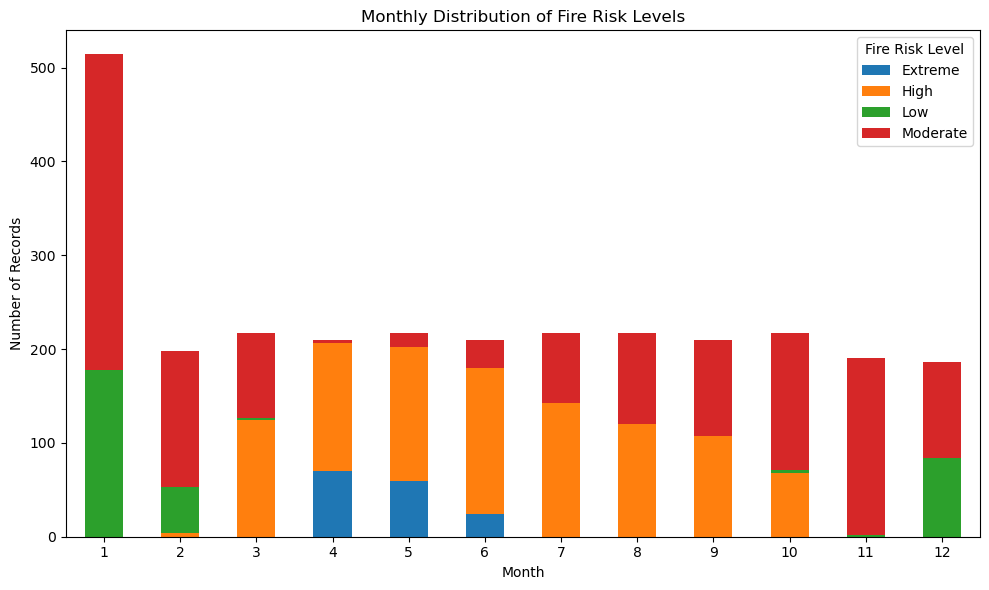

In [333]:
# Count number of records for each fire risk level in each month
monthly_counts = df.groupby(['Month','Risk_Level']).size().unstack(fill_value=0)

# Plot stacked bar chart to compare fire risk distribution across months
monthly_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.title("Monthly Distribution of Fire Risk Levels")
plt.xlabel("Month")
plt.ylabel("Number of Records")
plt.legend(title="Fire Risk Level")
plt.xticks(rotation=0)   # Keep month labels readable
plt.tight_layout()
plt.show()


#### Fire Risk Intensity By month

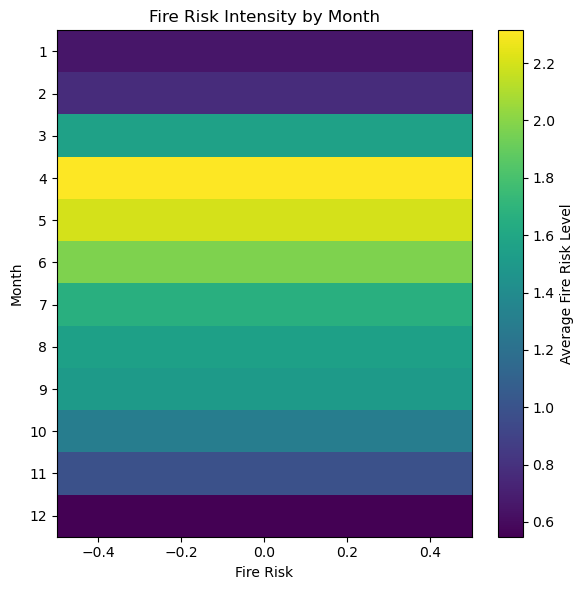

In [335]:
# Create pivot table to compute average fire risk level for each month
heatmap_data = df.pivot_table(
    values='Risk_Code',
    index='Month',
    aggfunc='mean'
)

plt.figure(figsize=(6,6))
plt.imshow(heatmap_data, aspect='auto')
plt.colorbar(label='Average Fire Risk Level')

plt.title("Fire Risk Intensity by Month")
plt.xlabel("Fire Risk")
plt.ylabel("Month")
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

plt.tight_layout()
plt.show()


#### Feature Distribution Summary 

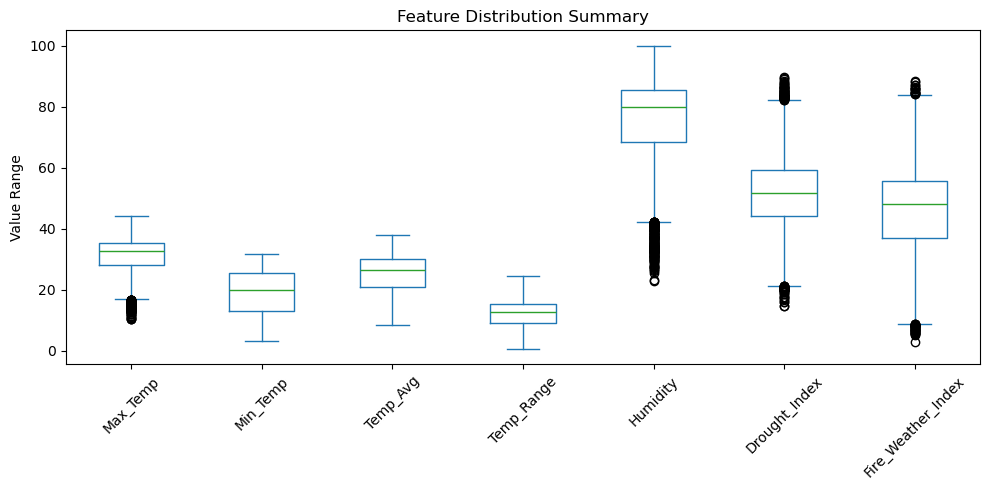

In [338]:
# Plot boxplots to visualize the distribution and spread of key features
df[features_for_corr].plot(
    kind='box',
    figsize=(10,5)
)

plt.title("Feature Distribution Summary")
plt.ylabel("Value Range")
plt.xticks(rotation=45)   # Rotate labels for readability
plt.tight_layout()
plt.show()

#### Prepare data for Machine Learning

In [343]:
# Define input features (X) and target variable (y)
features = ['Max_Temp', 'Min_Temp', 'Humidity', 'Temp_Range', 
            'Temp_Avg', 'Drought_Index', 'Month', 'Day_of_Year', 'Ward']

X = df[features].copy()
y = df['Risk_Code'].copy()

# Handle any remaining missing values
X = X.fillna(0)

# Display dataset dimensions
print(f" Features (X): {X.shape}")
print(f" Target (y): {y.shape}")

# Display selected features
print(f"\nFeatures we're using: {features}")

# Display number of samples per fire risk class
print(f"\nTarget classes:")
for i, risk in enumerate(['Low', 'Moderate', 'High', 'Extreme']):
    count = (y == i).sum()
    print(f"  {risk} ({i}): {count} samples")

X.head()


 Features (X): (2804, 9)
 Target (y): (2804,)

Features we're using: ['Max_Temp', 'Min_Temp', 'Humidity', 'Temp_Range', 'Temp_Avg', 'Drought_Index', 'Month', 'Day_of_Year', 'Ward']

Target classes:
  Low (0): 319 samples
  Moderate (1): 1331 samples
  High (2): 1001 samples
  Extreme (3): 153 samples


,Max_Temp,Min_Temp,Humidity,Temp_Range,Temp_Avg,Drought_Index,Month,Day_of_Year,Ward
0,22.8,6.0,73.6,16.8,14.40,40.800000,1,1,4
1,23.4,4.8,86.6,18.6,14.10,34.800000,1,2,6
2,22.4,4.5,87.8,17.9,13.45,32.983333,1,3,6
3,22.5,7.0,81.8,15.5,14.75,36.516667,1,4,9
4,23.4,7.0,79.7,16.4,15.20,38.616667,1,5,9


#### Train and Test Data

In [345]:
# Split data into training (80%) and testing (20%) sets while preserving class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f" Data split complete!")
print(f"\nTraining set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Scale features for models sensitive to feature magnitude (e.g., Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n Features scaled!")


 Data split complete!

Training set: 2243 samples (80.0%)
Test set: 561 samples (20.0%)

 Features scaled!


### Model 1- Logistic Regression

 Logistic Regression trained!
 Test Accuracy: 96.79%


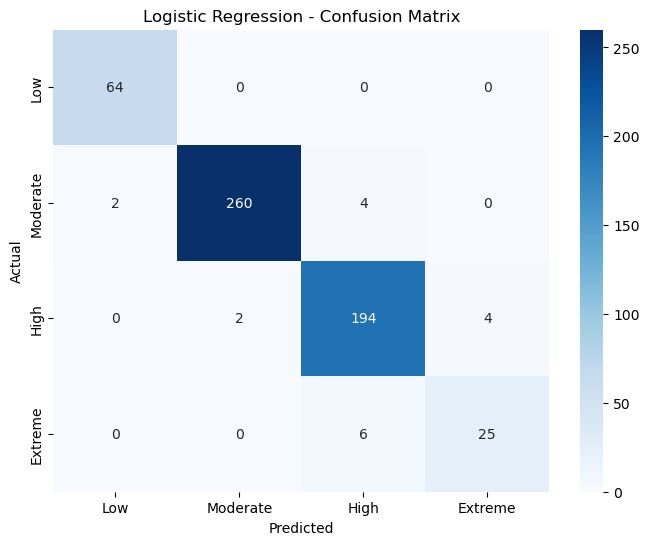


 Classification Report:
              precision    recall  f1-score   support

         Low       0.97      1.00      0.98        64
    Moderate       0.99      0.98      0.98       266
        High       0.95      0.97      0.96       200
     Extreme       0.86      0.81      0.83        31

    accuracy                           0.97       561
   macro avg       0.94      0.94      0.94       561
weighted avg       0.97      0.97      0.97       561


 Cross-Validation Score: 95.63% (+/- 1.28%)


In [162]:

# Create and train model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print(f" Logistic Regression trained!")
print(f" Test Accuracy: {lr_accuracy*100:.2f}%")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High', 'Extreme'],
            yticklabels=['Low', 'Moderate', 'High', 'Extreme'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_lr, 
                           target_names=['Low', 'Moderate', 'High', 'Extreme']))

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print(f"\n Cross-Validation Score: {cv_scores_lr.mean()*100:.2f}% (+/- {cv_scores_lr.std()*100:.2f}%)")

#### ROC Curver + ROC-AUC

LR ROC-AUC (macro): 0.9976593790394079
LR ROC-AUC (weighted): 0.997483590557449


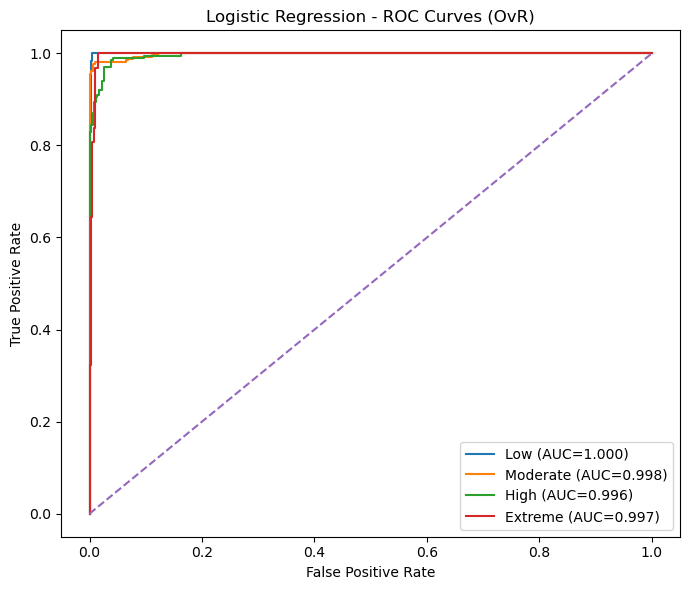

In [347]:
# Define class labels
CLASS_NAMES = ['Low', 'Moderate', 'High', 'Extreme']

# Get predicted probabilities for test data
y_proba_lr = lr_model.predict_proba(X_test_scaled)

# Binarize target labels for multi-class ROC (One-vs-Rest)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC-AUC scores (macro and weighted)
roc_auc_macro = roc_auc_score(y_test_bin, y_proba_lr, average="macro", multi_class="ovr")
roc_auc_weighted = roc_auc_score(y_test_bin, y_proba_lr, average="weighted", multi_class="ovr")

print("LR ROC-AUC (macro):", roc_auc_macro)
print("LR ROC-AUC (weighted):", roc_auc_weighted)

# Plot ROC curves for each fire risk class
plt.figure(figsize=(7,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_lr[:, i])
    plt.plot(fpr, tpr, label=f"{CLASS_NAMES[i]} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1], [0,1], '--')  # Random classifier baseline
plt.title("Logistic Regression - ROC Curves (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


#### Precision-Recall Curves 

LR Average Precision (macro): 0.9812793245172433


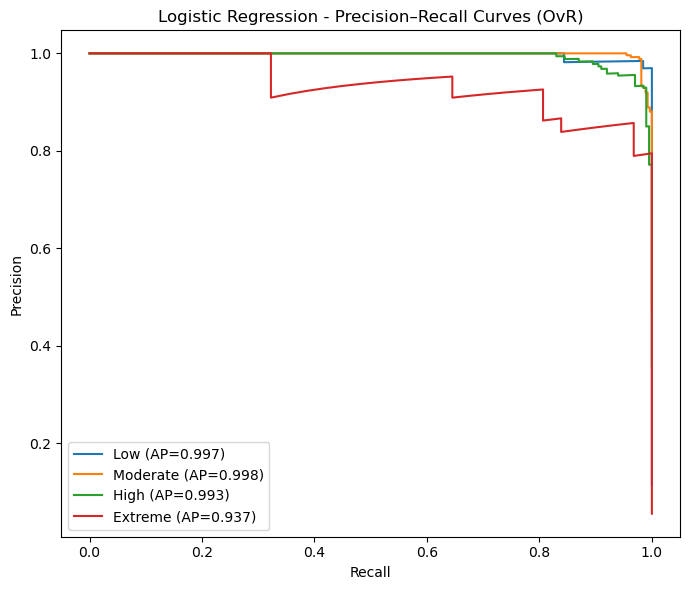

In [349]:
plt.figure(figsize=(7,6))  # Set figure size
ap_scores = []

# Plot Precision–Recall curves for each fire risk class (OvR)
for i in range(y_test_bin.shape[1]):
    p, r, _ = precision_recall_curve(y_test_bin[:, i], y_proba_lr[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_proba_lr[:, i])
    ap_scores.append(ap)
    plt.plot(r, p, label=f"{CLASS_NAMES[i]} (AP={ap:.3f})")

# Print macro-average precision across all classes
print("LR Average Precision (macro):", np.mean(ap_scores))

plt.title("Logistic Regression - Precision–Recall Curves (OvR)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.tight_layout()
plt.show()


#### Coefficient Importance Diagram

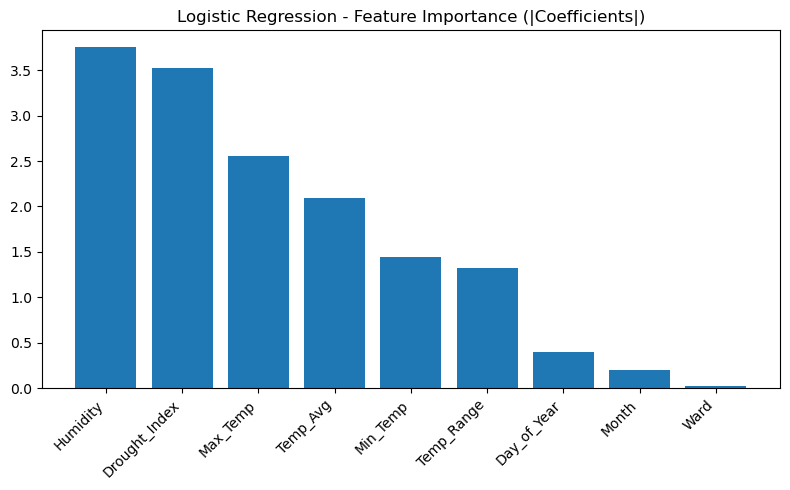

In [351]:
feature_names = features  # Feature names used in the model

# Compute absolute coefficient values to measure feature importance
coef = lr_model.coef_
coef_importance = np.mean(np.abs(coef), axis=0)

# Sort features by importance (descending)
idx = np.argsort(coef_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(8,5))
plt.bar(range(len(idx)), coef_importance[idx])
plt.xticks(range(len(idx)), np.array(feature_names)[idx], rotation=45, ha="right")
plt.title("Logistic Regression - Feature Importance (|Coefficients|)")
plt.tight_layout()
plt.show()


### Model 2 - Random Forest

Random Forest trained!
Test Accuracy: 98.04%


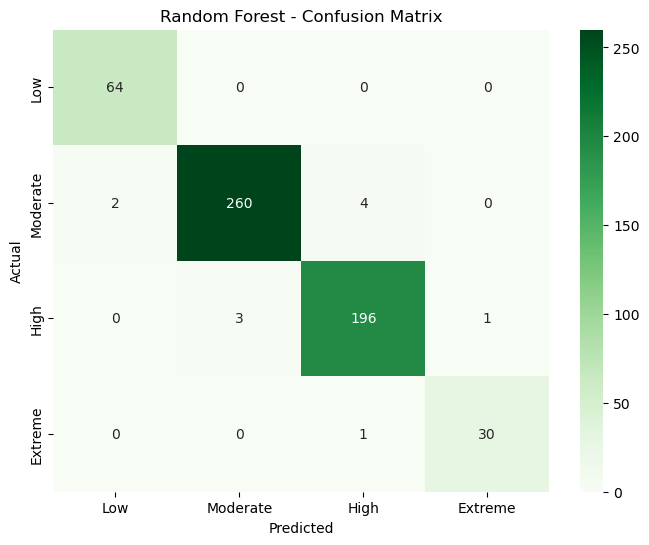


 Classification Report:
              precision    recall  f1-score   support

         Low       0.97      1.00      0.98        64
    Moderate       0.99      0.98      0.98       266
        High       0.98      0.98      0.98       200
     Extreme       0.97      0.97      0.97        31

    accuracy                           0.98       561
   macro avg       0.98      0.98      0.98       561
weighted avg       0.98      0.98      0.98       561


 Cross-Validation Score: 98.31% (+/- 0.59%)

 Top 5 Important Features:
         Feature  Importance
5  Drought_Index    0.419585
0       Max_Temp    0.238104
2       Humidity    0.149990
4       Temp_Avg    0.091327
1       Min_Temp    0.037214


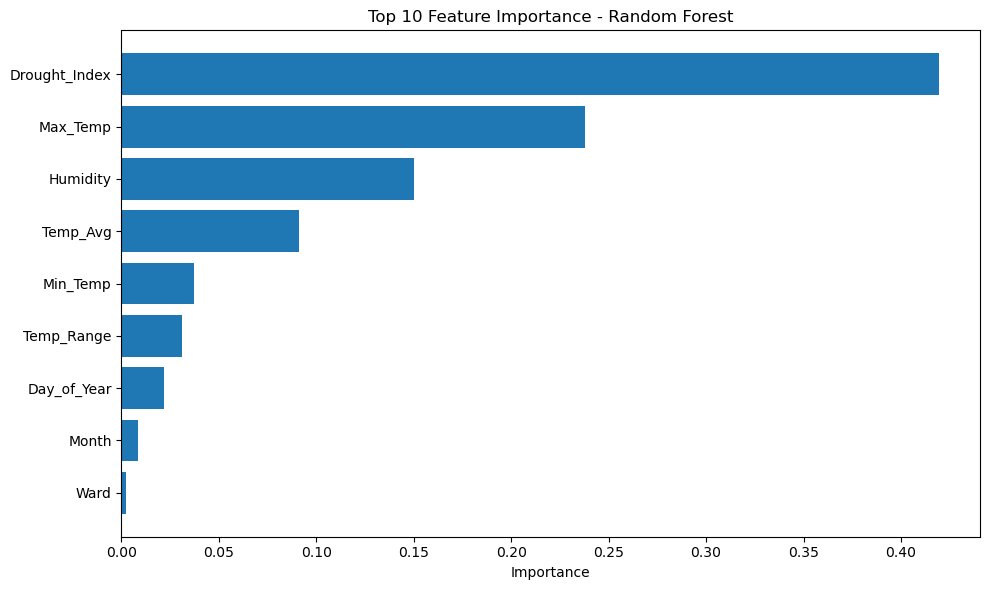

In [354]:
# Create and train model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest trained!")
print(f"Test Accuracy: {rf_accuracy*100:.2f}%")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'Moderate', 'High', 'Extreme'],
            yticklabels=['Low', 'Moderate', 'High', 'Extreme'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_rf,
                           target_names=['Low', 'Moderate', 'High', 'Extreme']))

# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"\n Cross-Validation Score: {cv_scores_rf.mean()*100:.2f}% (+/- {cv_scores_rf.std()*100:.2f}%)")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Top 5 Important Features:")
print(feature_importance.head())

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### ROC Curves + ROC-AUC 

RF ROC-AUC (macro): 0.9995225487229211
RF ROC-AUC (weighted): 0.9994354961893915


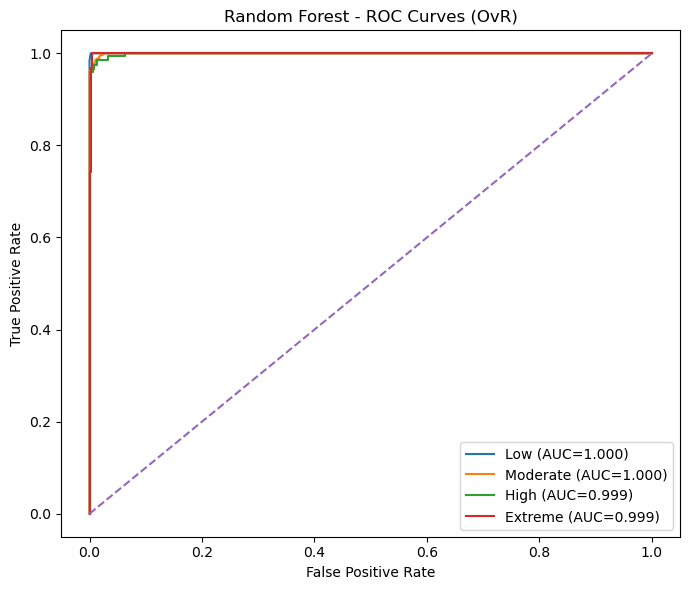

In [356]:
# Get predicted probabilities from Random Forest
y_proba_rf = rf_model.predict_proba(X_test)

# Binarize target labels for multi-class ROC (One-vs-Rest)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC-AUC scores (macro and weighted)
roc_auc_macro = roc_auc_score(y_test_bin, y_proba_rf, average="macro", multi_class="ovr")
roc_auc_weighted = roc_auc_score(y_test_bin, y_proba_rf, average="weighted", multi_class="ovr")

print("RF ROC-AUC (macro):", roc_auc_macro)
print("RF ROC-AUC (weighted):", roc_auc_weighted)

# Plot ROC curves for each fire risk class
plt.figure(figsize=(7,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_rf[:, i])
    plt.plot(fpr, tpr, label=f"{CLASS_NAMES[i]} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1], [0,1], '--')  # Random classifier baseline
plt.title("Random Forest - ROC Curves (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


#### Precision-Recall Curves 

RF Average Precision (macro): 0.9969137240914083


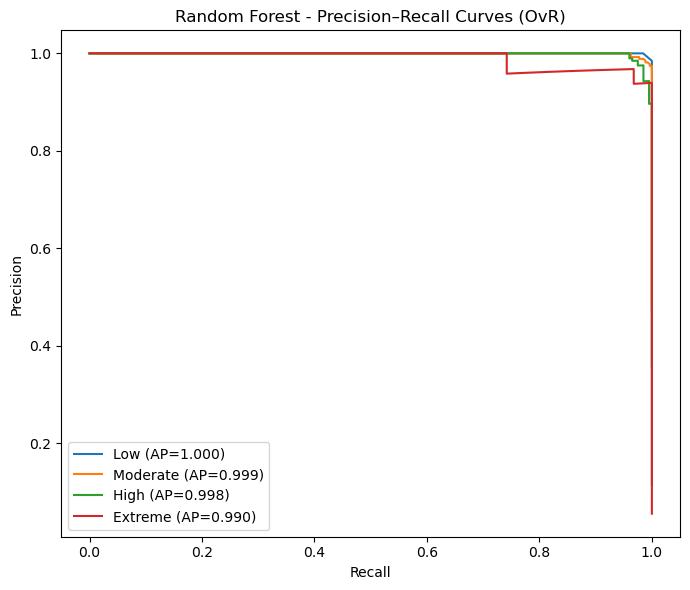

In [358]:
plt.figure(figsize=(7,6))  # Set figure size
ap_scores = []

# Plot Precision–Recall curves for each fire risk class (OvR)
for i in range(y_test_bin.shape[1]):
    p, r, _ = precision_recall_curve(y_test_bin[:, i], y_proba_rf[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_proba_rf[:, i])
    ap_scores.append(ap)
    plt.plot(r, p, label=f"{CLASS_NAMES[i]} (AP={ap:.3f})")

# Print macro-average precision across all classes
print("RF Average Precision (macro):", np.mean(ap_scores))

plt.title("Random Forest - Precision–Recall Curves (OvR)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.tight_layout()
plt.show()


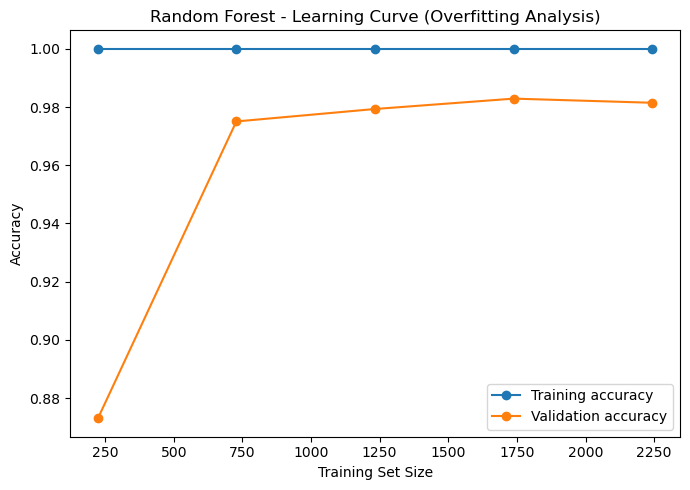

In [362]:
# Generate learning curves to analyze model performance as training data increases
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X, y,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_scores.mean(axis=1), marker="o", label="Training accuracy")
plt.plot(train_sizes, val_scores.mean(axis=1), marker="o", label="Validation accuracy")

plt.title("Random Forest - Learning Curve (Overfitting Analysis)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


### Model 3- XGBoost( Best Performance)

 XGBoost trained!
 Test Accuracy: 98.22%


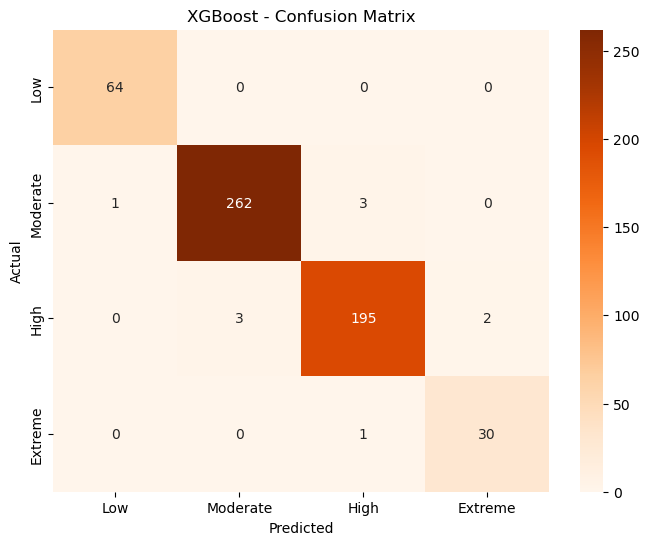


 Classification Report:
              precision    recall  f1-score   support

         Low       0.98      1.00      0.99        64
    Moderate       0.99      0.98      0.99       266
        High       0.98      0.97      0.98       200
     Extreme       0.94      0.97      0.95        31

    accuracy                           0.98       561
   macro avg       0.97      0.98      0.98       561
weighted avg       0.98      0.98      0.98       561


 Cross-Validation Score: 97.95% (+/- 1.23%)

 Top 5 Important Features:
         Feature  Importance
5  Drought_Index    0.717077
0       Max_Temp    0.074570
2       Humidity    0.059631
1       Min_Temp    0.041959
4       Temp_Avg    0.035117


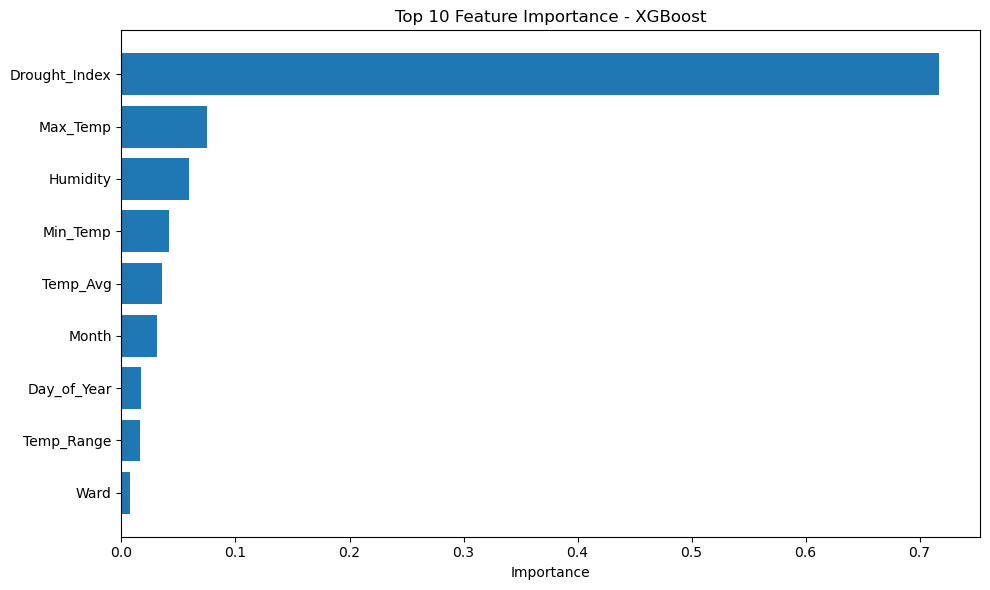

In [59]:
# Create and train model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f" XGBoost trained!")
print(f" Test Accuracy: {xgb_accuracy*100:.2f}%")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low', 'Moderate', 'High', 'Extreme'],
            yticklabels=['Low', 'Moderate', 'High', 'Extreme'])
plt.title('XGBoost - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_xgb,
                           target_names=['Low', 'Moderate', 'High', 'Extreme']))

# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"\n Cross-Validation Score: {cv_scores_xgb.mean()*100:.2f}% (+/- {cv_scores_xgb.std()*100:.2f}%)")

# Feature Importance
feature_importance_xgb = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Top 5 Important Features:")
print(feature_importance_xgb.head())

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_xgb['Feature'][:10], feature_importance_xgb['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### ROC Curves + ROC-AUC 

XGB ROC-AUC (macro): 0.9995010412026337
XGB ROC-AUC (weighted): 0.9993829303158105


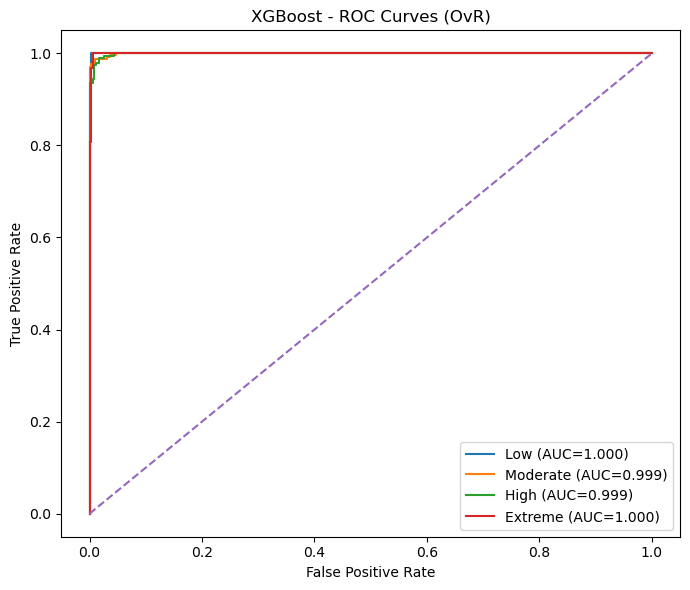

In [364]:
# Get predicted probabilities from XGBoost
y_proba_xgb = xgb_model.predict_proba(X_test)

# Binarize target labels for multi-class ROC (One-vs-Rest)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC-AUC scores (macro and weighted)
roc_auc_macro = roc_auc_score(y_test_bin, y_proba_xgb, average="macro", multi_class="ovr")
roc_auc_weighted = roc_auc_score(y_test_bin, y_proba_xgb, average="weighted", multi_class="ovr")

print("XGB ROC-AUC (macro):", roc_auc_macro)
print("XGB ROC-AUC (weighted):", roc_auc_weighted)

# Plot ROC curves for each fire risk class
plt.figure(figsize=(7,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_xgb[:, i])
    plt.plot(fpr, tpr, label=f"{CLASS_NAMES[i]} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1], [0,1], '--')  # Random classifier baseline
plt.title("XGBoost - ROC Curves (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


#### Precision -Recall Curves + Average Precision

XGB Average Precision (macro): 0.9972322352284939


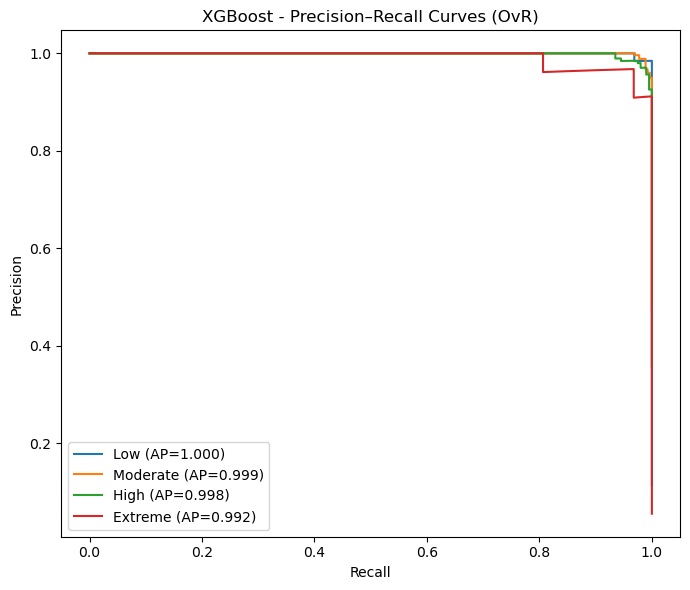

In [366]:
plt.figure(figsize=(7,6))  # Set figure size
ap_scores = []

# Plot Precision–Recall curves for each fire risk class (OvR)
for i in range(y_test_bin.shape[1]):
    p, r, _ = precision_recall_curve(y_test_bin[:, i], y_proba_xgb[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_proba_xgb[:, i])
    ap_scores.append(ap)
    plt.plot(r, p, label=f"{CLASS_NAMES[i]} (AP={ap:.3f})")

# Print macro-average precision across all classes
print("XGB Average Precision (macro):", np.mean(ap_scores))

plt.title("XGBoost - Precision–Recall Curves (OvR)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.tight_layout()
plt.show()

### Compare All 3 models

#### Comparative Metrics Table (Accuracy, Precision, Recall, F1)

In [368]:
CLASS_NAMES = ['Low', 'Moderate', 'High', 'Extreme']

# Generate predictions for each model
y_pred_lr  = lr_model.predict(X_test_scaled)
y_pred_rf  = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Create a comparison table with key evaluation metrics
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision (weighted)": [
        precision_score(y_test, y_pred_lr, average="weighted", zero_division=0),
        precision_score(y_test, y_pred_rf, average="weighted", zero_division=0),
        precision_score(y_test, y_pred_xgb, average="weighted", zero_division=0)
    ],
    "Recall (weighted)": [
        recall_score(y_test, y_pred_lr, average="weighted", zero_division=0),
        recall_score(y_test, y_pred_rf, average="weighted", zero_division=0),
        recall_score(y_test, y_pred_xgb, average="weighted", zero_division=0)
    ],
    "F1 (weighted)": [
        f1_score(y_test, y_pred_lr, average="weighted", zero_division=0),
        f1_score(y_test, y_pred_rf, average="weighted", zero_division=0),
        f1_score(y_test, y_pred_xgb, average="weighted", zero_division=0)
    ]
})

metrics_df


,Model,Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
0,Logistic Regression,0.967914,0.967826,0.967914,0.967732
1,Random Forest,0.980392,0.980484,0.980392,0.980394
2,XGBoost,0.982175,0.982258,0.982175,0.982192


#### Comparative Confusion Matrices

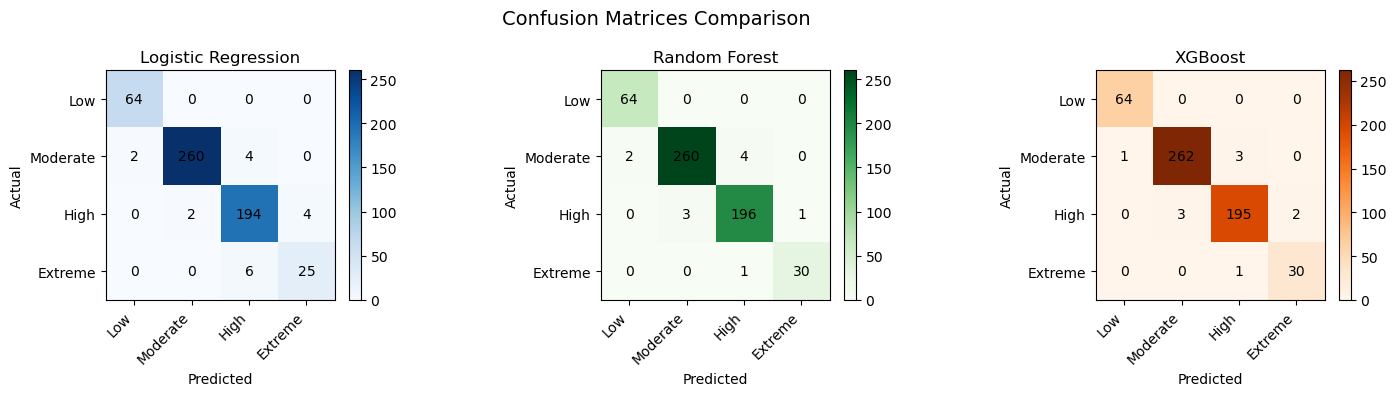

In [370]:
CLASS_NAMES = ['Low', 'Moderate', 'High', 'Extreme']

# Generate predictions for each model
y_pred_lr  = lr_model.predict(X_test_scaled)
y_pred_rf  = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Store confusion matrices with titles and color maps
cms = [
    ("Logistic Regression", confusion_matrix(y_test, y_pred_lr), "Blues"),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), "Greens"),
    ("XGBoost", confusion_matrix(y_test, y_pred_xgb), "Oranges")
]

plt.figure(figsize=(15, 4))

# Plot confusion matrices side by side for comparison
for i, (title, cm, cmap) in enumerate(cms, start=1):
    ax = plt.subplot(1, 3, i)
    im = ax.imshow(cm, cmap=cmap)
    
    ax.set_title(title)
    ax.set_xticks(range(len(CLASS_NAMES)))
    ax.set_yticks(range(len(CLASS_NAMES)))
    ax.set_xticklabels(CLASS_NAMES, rotation=45, ha="right")
    ax.set_yticklabels(CLASS_NAMES)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    
    # Display counts inside each cell
    for row in range(cm.shape[0]):
        for col in range(cm.shape[1]):
            ax.text(col, row, cm[row, col],
                    ha="center", va="center", color="black")

    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle("Confusion Matrices Comparison", fontsize=14)
plt.tight_layout()
plt.show()


#### Comparative ROC-AUC 

In [372]:
# Binarize target labels for multi-class ROC-AUC (One-vs-Rest)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Get predicted probabilities from each model
proba_lr  = lr_model.predict_proba(X_test_scaled)
proba_rf  = rf_model.predict_proba(X_test)
proba_xgb = xgb_model.predict_proba(X_test)

# Print macro-average ROC-AUC scores
print("ROC-AUC (macro, OvR)")
print("LR :", roc_auc_score(y_test_bin, proba_lr,  average="macro",    multi_class="ovr"))
print("RF :", roc_auc_score(y_test_bin, proba_rf,  average="macro",    multi_class="ovr"))
print("XGB:", roc_auc_score(y_test_bin, proba_xgb, average="macro",    multi_class="ovr"))

# Print weighted-average ROC-AUC scores
print("\nROC-AUC (weighted, OvR)")
print("LR :", roc_auc_score(y_test_bin, proba_lr,  average="weighted", multi_class="ovr"))
print("RF :", roc_auc_score(y_test_bin, proba_rf,  average="weighted", multi_class="ovr"))
print("XGB:", roc_auc_score(y_test_bin, proba_xgb, average="weighted", multi_class="ovr"))


ROC-AUC (macro, OvR)
LR : 0.9976593790394079
RF : 0.9995225487229211
XGB: 0.9995010412026337

ROC-AUC (weighted, OvR)
LR : 0.997483590557449
RF : 0.9994354961893915
XGB: 0.9993829303158105


#### COmparative ROC Curve

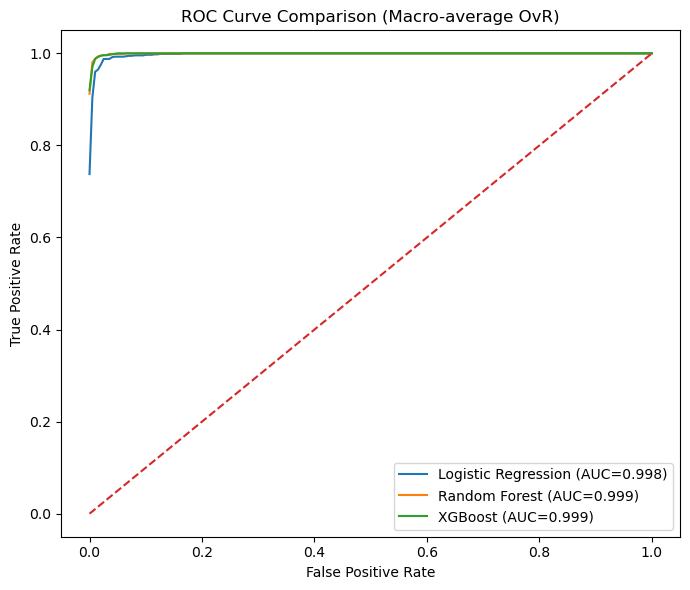

In [375]:
# Binarize target labels for multi-class ROC analysis
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predicted probabilities from each model
proba_lr  = lr_model.predict_proba(X_test_scaled)
proba_rf  = rf_model.predict_proba(X_test)
proba_xgb = xgb_model.predict_proba(X_test)

# Function to compute macro-average ROC curve across all classes
def macro_roc_curve(y_bin, proba, points=200):
    fpr_grid = np.linspace(0, 1, points)
    tprs = []
    for i in range(y_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_bin[:, i], proba[:, i])
        tprs.append(np.interp(fpr_grid, fpr, tpr))
    mean_tpr = np.mean(tprs, axis=0)
    return fpr_grid, mean_tpr, auc(fpr_grid, mean_tpr)

plt.figure(figsize=(7,6))

# Plot macro-average ROC curves for all models
for name, proba in [
    ("Logistic Regression", proba_lr),
    ("Random Forest", proba_rf),
    ("XGBoost", proba_xgb)
]:
    fpr, tpr, a = macro_roc_curve(y_test_bin, proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={a:.3f})")

plt.plot([0,1], [0,1], "--")  # Random classifier baseline
plt.title("ROC Curve Comparison (Macro-average OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


#### Comparative Precision-Recall Curves

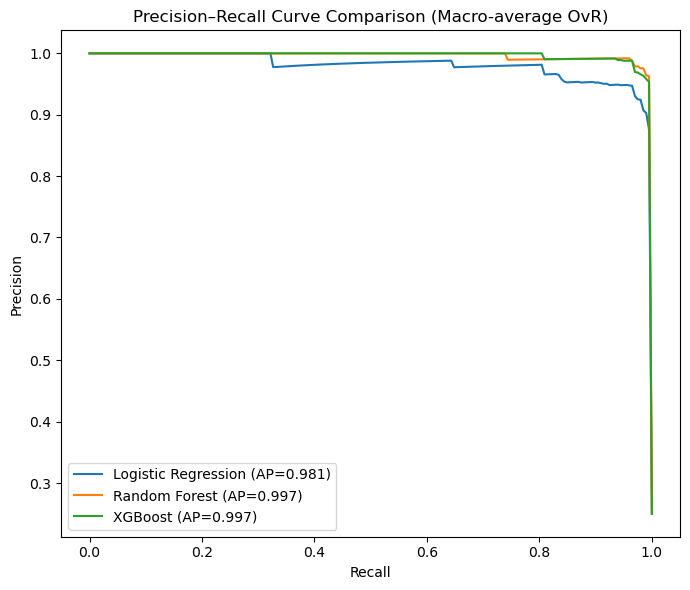

In [377]:
# Binarize target labels for multi-class Precision–Recall analysis
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predicted probabilities from each model
proba_lr  = lr_model.predict_proba(X_test_scaled)
proba_rf  = rf_model.predict_proba(X_test)
proba_xgb = xgb_model.predict_proba(X_test)

# Function to compute macro-average Precision–Recall curve
def macro_pr_curve(y_bin, proba, points=200):
    r_grid = np.linspace(0, 1, points)
    ps = []
    for i in range(y_bin.shape[1]):
        p, r, _ = precision_recall_curve(y_bin[:, i], proba[:, i])
        ps.append(np.interp(r_grid, r[::-1], p[::-1]))  # ensure increasing recall
    mean_p = np.mean(ps, axis=0)

    ap_scores = [
        average_precision_score(y_bin[:, i], proba[:, i])
        for i in range(y_bin.shape[1])
    ]
    ap_macro = float(np.mean(ap_scores))
    return r_grid, mean_p, ap_macro

plt.figure(figsize=(7,6))

# Plot macro-average Precision–Recall curves for all models
for name, proba in [
    ("Logistic Regression", proba_lr),
    ("Random Forest", proba_rf),
    ("XGBoost", proba_xgb)
]:
    r, p, ap = macro_pr_curve(y_test_bin, proba)
    plt.plot(r, p, label=f"{name} (AP={ap:.3f})")

plt.title("Precision–Recall Curve Comparison (Macro-average OvR)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.tight_layout()
plt.show()


#### Comparative Bar Chart

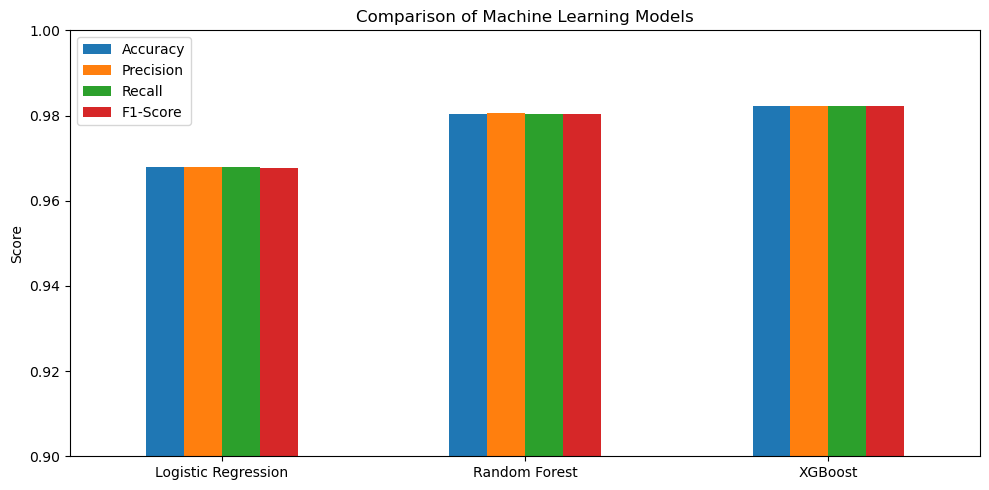

In [379]:
# Generate predictions for each model
y_pred_lr  = lr_model.predict(X_test_scaled)
y_pred_rf  = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Create a comparison table using key evaluation metrics
compare_df = pd.DataFrame({
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr, average="weighted", zero_division=0),
        precision_score(y_test, y_pred_rf, average="weighted", zero_division=0),
        precision_score(y_test, y_pred_xgb, average="weighted", zero_division=0)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr, average="weighted", zero_division=0),
        recall_score(y_test, y_pred_rf, average="weighted", zero_division=0),
        recall_score(y_test, y_pred_xgb, average="weighted", zero_division=0)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr, average="weighted", zero_division=0),
        f1_score(y_test, y_pred_rf, average="weighted", zero_division=0),
        f1_score(y_test, y_pred_xgb, average="weighted", zero_division=0)
    ]
}, index=["Logistic Regression", "Random Forest", "XGBoost"])

# Plot bar chart to visually compare model performance
compare_df.plot(kind="bar", figsize=(10,5))
plt.title("Comparison of Machine Learning Models")
plt.ylabel("Score")
plt.ylim(0.9, 1.0)   # Zoomed range for clearer comparison
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Best Model Bar Chart

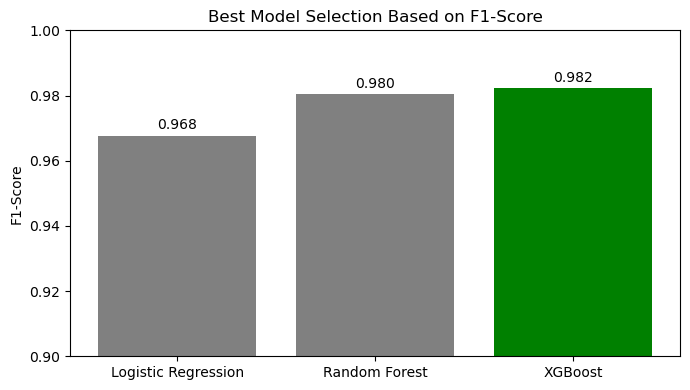

Best Performing Model: XGBoost


In [381]:
# Extract F1-scores for each model
f1_scores = compare_df["F1-Score"]

# Identify the best-performing model
best_model = f1_scores.idxmax()

# Highlight the best model in the bar chart
colors = ["gray" if model != best_model else "green" for model in f1_scores.index]

plt.figure(figsize=(7,4))
plt.bar(f1_scores.index, f1_scores.values, color=colors)
plt.title("Best Model Selection Based on F1-Score")
plt.ylabel("F1-Score")
plt.ylim(0.9, 1.0)

# Display F1-score values above bars
for i, v in enumerate(f1_scores.values):
    plt.text(i, v + 0.002, f"{v:.3f}", ha="center")

plt.tight_layout()
plt.show()

print("Best Performing Model:", best_model)


### Prediction Function

In [63]:
def predict_fire_risk_simple(max_temp, min_temp, humidity, month=1, ward=1):
    """
    Predict fire risk based on weather conditions
    
    Parameters:
    -----------
    max_temp : Maximum temperature in °C
    min_temp : Minimum temperature in °C
    humidity : Humidity percentage (0-100)
    month : Month (1-12)
    ward : Ward number
    
    Returns:
    --------
    Risk level and details
    """
    # Calculate features
    temp_range = max_temp - min_temp
    temp_avg = (max_temp + min_temp) / 2
    day_of_year = month * 30
    drought_index = (temp_avg / 30 * 0.4 + 
                    (100 - humidity) / 100 * 0.5 + 
                    temp_range / 20 * 0.1) * 100
    
    # Create feature array
    new_data = pd.DataFrame({
        'Max_Temp': [max_temp],
        'Min_Temp': [min_temp],
        'Humidity': [humidity],
        'Temp_Range': [temp_range],
        'Temp_Avg': [temp_avg],
        'Drought_Index': [drought_index],
        'Month': [month],
        'Day_of_Year': [day_of_year],
        'Ward': [ward]
    })
    
    # Make prediction with best model
    if best_model_name == 'Logistic Regression':
        new_data_scaled = scaler.transform(new_data)
        prediction = best_model.predict(new_data_scaled)[0]
        probabilities = best_model.predict_proba(new_data_scaled)[0]
    else:
        prediction = best_model.predict(new_data)[0]
        probabilities = best_model.predict_proba(new_data)[0]
    
    # Get risk name
    risk_names = ['Low', 'Moderate', 'High', 'Extreme']
    risk_level = risk_names[prediction]
    confidence = probabilities[prediction] * 100
    
    # Calculate Fire Weather Index
    if temp_avg < 15:
        temp_score = 0
    elif temp_avg < 25:
        temp_score = (temp_avg - 15) * 2
    else:
        temp_score = 20 + min((temp_avg - 25) * 2, 10)
    
    humidity_score = (100 - humidity) * 0.4
    range_score = min(temp_range * 0.75, 15)
    drought_score = drought_index * 0.15
    fwi = temp_score + humidity_score + range_score + drought_score
    
    # Return results
    return {
        'Risk_Level': risk_level,
        'Confidence': f'{confidence:.1f}%',
        'Fire_Weather_Index': f'{fwi:.1f}',
        'Drought_Index': f'{drought_index:.1f}',
        'Input': {
            'Max_Temp': f'{max_temp}°C',
            'Min_Temp': f'{min_temp}°C',
            'Humidity': f'{humidity}%',
            'Month': month
        },
        'All_Probabilities': {
            'Low': f'{probabilities[0]*100:.1f}%',
            'Moderate': f'{probabilities[1]*100:.1f}%' if len(probabilities) > 1 else '0%',
            'High': f'{probabilities[2]*100:.1f}%' if len(probabilities) > 2 else '0%',
            'Extreme': f'{probabilities[3]*100:.1f}%' if len(probabilities) > 3 else '0%'
        }
    }

print("Prediction function created!")

Prediction function created!


In [64]:
### Test Prediction

# Test Case 1: High Risk
print("\n TEST 1: HIGH RISK SCENARIO")
print("-" * 50)
result1 = predict_fire_risk_simple(
    max_temp=32,
    min_temp=18,
    humidity=30,
    month=4
)

print(f"Input: Max={result1['Input']['Max_Temp']}, Min={result1['Input']['Min_Temp']}, "
      f"Humidity={result1['Input']['Humidity']}, Month={result1['Input']['Month']}")
print(f"\n PREDICTION: {result1['Risk_Level']}")
print(f"   Confidence: {result1['Confidence']}")
print(f"   Fire Weather Index: {result1['Fire_Weather_Index']}")
print(f"   Drought Index: {result1['Drought_Index']}")
print(f"\n All Probabilities:")
for risk, prob in result1['All_Probabilities'].items():
    print(f"   {risk}: {prob}")

# Test Case 2: Low Risk
print("\n\n TEST 2: LOW RISK SCENARIO")
print("-" * 50)
result2 = predict_fire_risk_simple(
    max_temp=20,
    min_temp=12,
    humidity=80,
    month=7
)

print(f"Input: Max={result2['Input']['Max_Temp']}, Min={result2['Input']['Min_Temp']}, "
      f"Humidity={result2['Input']['Humidity']}, Month={result2['Input']['Month']}")
print(f"\n PREDICTION: {result2['Risk_Level']}")
print(f"   Confidence: {result2['Confidence']}")
print(f"   Fire Weather Index: {result2['Fire_Weather_Index']}")
print(f"   Drought Index: {result2['Drought_Index']}")
print(f"\n All Probabilities:")
for risk, prob in result2['All_Probabilities'].items():
    print(f"   {risk}: {prob}")

# Test Case 3: Your Custom Input
print("\n\n TEST 3: CUSTOM INPUT (Change these values!)")
print("-" * 50)
result3 = predict_fire_risk_simple(
    max_temp=25,      # Change this
    min_temp=15,      # Change this
    humidity=50,      # Change this
    month=3           #  Change this
)

print(f"Input: Max={result3['Input']['Max_Temp']}, Min={result3['Input']['Min_Temp']}, "
      f"Humidity={result3['Input']['Humidity']}, Month={result3['Input']['Month']}")
print(f"\n PREDICTION: {result3['Risk_Level']}")
print(f"   Confidence: {result3['Confidence']}")
print(f"   Fire Weather Index: {result3['Fire_Weather_Index']}")
print(f"   Drought Index: {result3['Drought_Index']}")
print(f"\n All Probabilities:")
for risk, prob in result3['All_Probabilities'].items():
    print(f"   {risk}: {prob}")

print("\n All predictions complete!")


 TEST 1: HIGH RISK SCENARIO
--------------------------------------------------
Input: Max=32°C, Min=18°C, Humidity=30%, Month=4

 PREDICTION: High
   Confidence: 99.9%
   Fire Weather Index: 69.8
   Drought Index: 75.3

 All Probabilities:
   Low: 0.0%
   Moderate: 0.0%
   High: 99.9%
   Extreme: 0.0%


 TEST 2: LOW RISK SCENARIO
--------------------------------------------------
Input: Max=20°C, Min=12°C, Humidity=80%, Month=7

 PREDICTION: Low
   Confidence: 99.8%
   Fire Weather Index: 21.3
   Drought Index: 35.3

 All Probabilities:
   Low: 99.8%
   Moderate: 0.2%
   High: 0.0%
   Extreme: 0.0%


 TEST 3: CUSTOM INPUT (Change these values!)
--------------------------------------------------
Input: Max=25°C, Min=15°C, Humidity=50%, Month=3

 PREDICTION: Moderate
   Confidence: 90.3%
   Fire Weather Index: 46.0
   Drought Index: 56.7

 All Probabilities:
   Low: 0.1%
   Moderate: 90.3%
   High: 9.5%
   Extreme: 0.1%

 All predictions complete!


In [65]:

print(f"\n DATASET STATISTICS:")
print(f"   Total samples: {len(df)}")
print(f"   Features used: {len(features)}")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")

print(f"\n RISK DISTRIBUTION:")
for risk in ['Low', 'Moderate', 'High', 'Extreme']:
    count = (df['Risk_Level'] == risk).sum()
    percentage = count / len(df) * 100
    print(f"   {risk:12s}: {count:4d} ({percentage:5.1f}%)")

print(f"\n MODEL PERFORMANCE:")
print(f"   1. Logistic Regression: {lr_accuracy*100:.2f}%")
print(f"   2. Random Forest:       {rf_accuracy*100:.2f}%")
print(f"   3. XGBoost:             {xgb_accuracy*100:.2f}%")

print(f"\n BEST MODEL: {best_model_name}")
print(f"   Test Accuracy: {best_accuracy:.2f}%")

print(f"\n TOP 3 MOST IMPORTANT FEATURES:")
if best_model_name == 'Random Forest':
    top_features = feature_importance.head(3)
else:
    top_features = feature_importance_xgb.head(3)

for idx, row in top_features.iterrows():
    print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")




 DATASET STATISTICS:
   Total samples: 2804
   Features used: 9
   Training samples: 2243
   Test samples: 561

 RISK DISTRIBUTION:
   Low         :  319 ( 11.4%)
   Moderate    : 1331 ( 47.5%)
   High        : 1001 ( 35.7%)
   Extreme     :  153 (  5.5%)

 MODEL PERFORMANCE:
   1. Logistic Regression: 96.79%
   2. Random Forest:       98.04%
   3. XGBoost:             98.22%

 BEST MODEL: XGBoost
   Test Accuracy: 98.22%

 TOP 3 MOST IMPORTANT FEATURES:
   6. Drought_Index: 0.7171
   1. Max_Temp: 0.0746
   3. Humidity: 0.0596


In [67]:
print("COLUMN INFORMATION")
print(df.dtypes)

COLUMN INFORMATION
Date                  datetime64[ns]
Max_Temp                     float64
Min_Temp                     float64
Humidity                     float64
Province                      object
District                      object
Ga.Pa./No.Pa.                 object
Ward                           int64
Protected_area                object
Credibility                    int64
Latitude                     float64
Longitude                    float64
Temp_Range                   float64
Temp_Avg                     float64
Month                          int32
Day_of_Year                    int32
Season                        object
Drought_Index                float64
Fire_Weather_Index           float64
Risk_Level                    object
Risk_Code                      int64
dtype: object


In [68]:
print("\n3. FIRST 5 ROWS")
print(df.head())


3. FIRST 5 ROWS
        Date  Max_Temp  Min_Temp  Humidity Province      District  \
0 2019-01-01      22.8       6.0      73.6  Lumbini  Arghakhanchi   
1 2019-01-02      23.4       4.8      86.6  Lumbini  Arghakhanchi   
2 2019-01-03      22.4       4.5      87.8  Lumbini  Arghakhanchi   
3 2019-01-04      22.5       7.0      81.8  Lumbini  Arghakhanchi   
4 2019-01-05      23.4       7.0      79.7  Lumbini  Arghakhanchi   

  Ga.Pa./No.Pa.  Ward        Protected_area  Credibility  ...  Longitude  \
0  Bhumekasthan     4  Bardia National Park           82  ...   83.03600   
1  Bhumekasthan     6  Bardia National Park           47  ...   83.04000   
2        Panini     6  Bardia National Park           19  ...   83.19279   
3     Sitaganga     9  Bardia National Park           60  ...   82.87150   
4     Sitaganga     9  Bardia National Park           41  ...   82.88692   

   Temp_Range  Temp_Avg  Month  Day_of_Year  Season Drought_Index  \
0        16.8     14.40      1            

In [383]:
print("\n4. LAST 5 ROWS")
print(df.tail())


4. LAST 5 ROWS
           Date  Max_Temp  Min_Temp  Humidity Province   District  \
2807 2019-01-01      32.8      20.0      79.8  Lumbini  Rupandehi   
2808 2019-01-01      32.8      20.0      79.8  Lumbini  Rupandehi   
2809 2019-01-01      32.8      20.0      79.8  Lumbini  Rupandehi   
2810 2019-01-01      32.8      20.0      79.8  Lumbini  Rupandehi   
2811 2019-01-01      32.8      20.0      79.8  Lumbini  Rupandehi   

     Ga.Pa./No.Pa.  Ward        Protected_area  Credibility  ...  Longitude  \
2807        Debdah    10  Bardia National Park            6  ...   83.50882   
2808        Butwal    12  Bardia National Park           15  ...   83.42764   
2809        Debdah    10  Bardia National Park           77  ...   83.52421   
2810    Sainamaina    10  Bardia National Park           63  ...   83.22276   
2811        Debdah     6  Bardia National Park           73  ...   83.59995   

      Temp_Range  Temp_Avg  Month  Day_of_Year  Season Drought_Index  \
2807        12.8      

In [385]:
print("\n5. SUMMARY STATISTICS")
print(df.describe())


5. SUMMARY STATISTICS
                                Date     Max_Temp     Min_Temp     Humidity  \
count                           2804  2804.000000  2804.000000  2804.000000   
mean   2022-01-25 06:46:13.181169664    31.361685    18.965410    74.892661   
min              2019-01-01 00:00:00    10.400000     3.200000    22.735000   
25%              2020-02-08 18:00:00    28.000000    13.000000    68.253750   
50%              2022-01-09 12:00:00    32.800000    20.000000    79.800000   
75%              2023-12-11 06:00:00    35.400000    25.400000    85.588750   
max              2025-11-11 00:00:00    44.000000    31.800000   100.000000   
std                              NaN     5.997772     6.681537    15.812180   

              Ward  Credibility     Latitude    Longitude   Temp_Range  \
count  2804.000000  2804.000000  2804.000000  2804.000000  2804.000000   
mean     21.586662    61.424394    28.079507    82.406576    12.396275   
min       1.000000     0.000000    27.36528

In [391]:
import os

# Create a folder to store all results
RESULTS_DIR = "model_results"
os.makedirs(RESULTS_DIR, exist_ok=True)

print("Results will be saved in:", RESULTS_DIR)


Results will be saved in: model_results


In [393]:
import os
import joblib

joblib.dump(lr_model, os.path.join(RESULTS_DIR, "logistic_regression_model.pkl"))
joblib.dump(rf_model, os.path.join(RESULTS_DIR, "random_forest_model.pkl"))
joblib.dump(xgb_model, os.path.join(RESULTS_DIR, "xgboost_model.pkl"))

print("All trained models saved.")


All trained models saved.
